---------------------------

In [7]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:

df = pd.read_csv('df_reduced.csv', index_col=0)
df

,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,vitD_supp,...,Asthma,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening,Initial_days
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,Suburban,1,53,86575,Divorced,Male,No,19.14,6,0,...,Yes,3,3,2,2,4,3,3,4,10.59
2,Urban,3,51,46805,Married,Female,No,18.94,4,1,...,No,3,4,3,4,4,4,3,3,15.13
3,Suburban,3,53,14370,Widowed,Female,No,18.06,4,0,...,No,2,4,4,4,3,4,3,3,4.77
4,Suburban,0,78,39741,Married,Male,No,16.58,4,0,...,Yes,3,5,5,3,4,5,5,5,1.71
5,Rural,1,22,1209,Widowed,Female,No,17.44,5,2,...,No,2,1,3,3,5,3,4,3,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Urban,2,25,45967,Widowed,Male,No,16.98,4,1,...,No,3,2,2,3,4,3,4,2,51.56
9997,Urban,4,87,14983,Widowed,Male,Yes,18.18,5,0,...,Yes,3,3,4,2,5,3,4,4,68.67
9998,Rural,3,45,65917,Separated,Female,Yes,17.13,4,0,...,No,3,3,3,4,4,2,3,2,70.15


-------------------------------------


# C3.  Visualizations 

Univariate and Bivariate Visualizations for independent variables and their relationship with the dependent variable `Initial_days`. Seaborn and Matplotlib will be used to create visualizations and the choice of graph will depend on the nature of the variable being visualized. The web article by RealPython education site and Seaborn own documentation will be used as a guide for the visualizations. (sourcew) https://realpython.com/python-seaborn/ and (source) https://seaborn.pydata.org/introduction.html. 

# Univaraite Visualizations

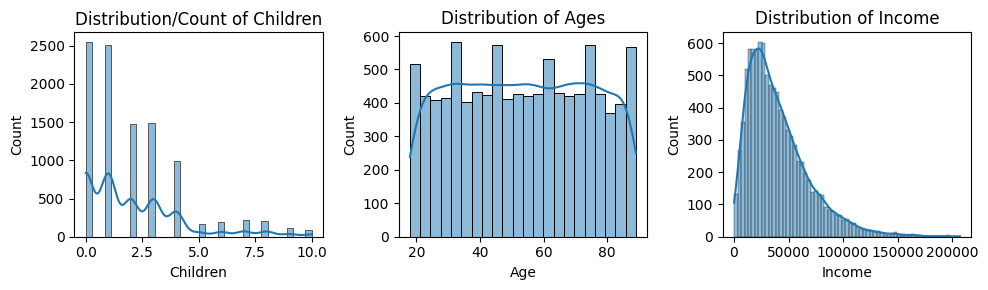

,count,mean,std,min,25%,50%,75%,max
Children,10000.0,2.0972,2.163659,0.0,0.00,1.0,3.00,10.0
Age,10000.0,53.5117,20.638538,18.0,36.00,53.0,71.00,89.0
Income,10000.0,40490.0021,28521.152883,154.0,19598.25,33768.0,54295.75,207249.0


In [9]:
# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of children
sns.histplot(data=df, x='Children', ax=axes[0], kde=True)
axes[0].set_title('Distribution/Count of Children')

# distribution of ages
sns.histplot(data=df, x='Age', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Ages')

# distribution of income
sns.histplot(data=df, x='Income', ax=axes[2], kde=True)
axes[2].set_title('Distribution of Income')

plt.tight_layout()
plt.show()

# summary statistics for the variables
df[['Children', 'Age', 'Income']].describe().transpose()

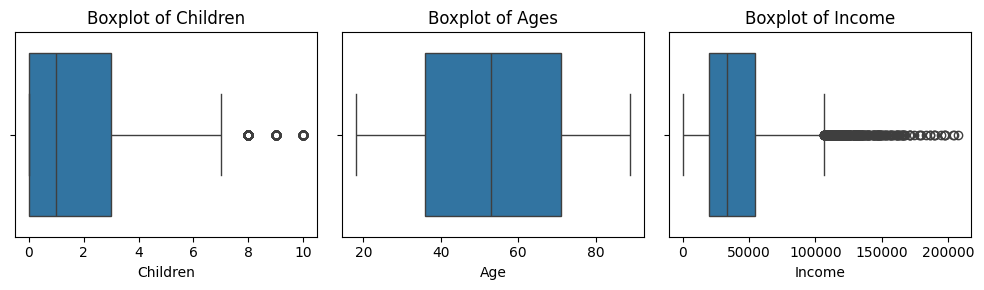

In [10]:
# subplots for the boxplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# boxplot of children
sns.boxplot(data=df, x='Children', ax=axes[0])
axes[0].set_title('Boxplot of Children')

# boxplot of ages
sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot of Ages')

# boxplot of income
sns.boxplot(data=df, x='Income', ax=axes[2])
axes[2].set_title('Boxplot of Income')

plt.tight_layout()
plt.show()




- The outliers here will be noted as they may impact the regression model, particularly with OLS regression. For now, we will note them and include as is in the initial model.

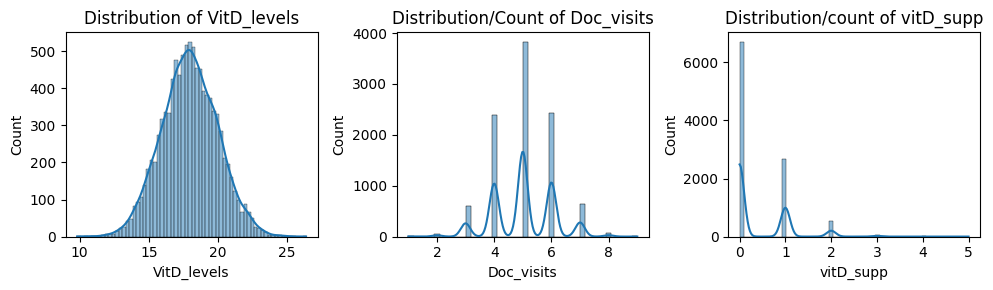

,count,mean,std,min,25%,50%,75%,max
VitD_levels,10000.0,17.964272,2.017259,9.81,16.6275,17.95,19.35,26.39
Doc_visits,10000.0,5.012200,1.045734,1.00,4.0000,5.00,6.00,9.00
vitD_supp,10000.0,0.398900,0.628505,0.00,0.0000,0.00,1.00,5.00


In [11]:
# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of VitD_levels
sns.histplot(data=df, x='VitD_levels', ax=axes[0], kde=True)
axes[0].set_title('Distribution of VitD_levels')

# distribution/count of Doc_visits with bigger bins
sns.histplot(data=df, x='Doc_visits', ax=axes[1], kde=True)
axes[1].set_title('Distribution/Count of Doc_visits')

# distribution/count of vitD_supp with bigger bins
sns.histplot(data=df, x='vitD_supp', ax=axes[2], kde=True)
axes[2].set_title('Distribution/count of vitD_supp')

plt.tight_layout()
plt.show()
# descriptive statistics for the variables
df[['VitD_levels', 'Doc_visits', 'vitD_supp']].describe().transpose()

- The `Vitamin D levels` appear normally distributed around a middle value, suggesting that most patients have Vitamin D levels within a standard range, with fewer individuals having very high or very low levels. `Doc_visits` show a pattern with most patientss having 4-6 visits, and the frequency drops for higher numbers of visits. For Vitamin `D supplements`, most patients are not given supplements, which aligns with the distribution of Vitamin D levels.

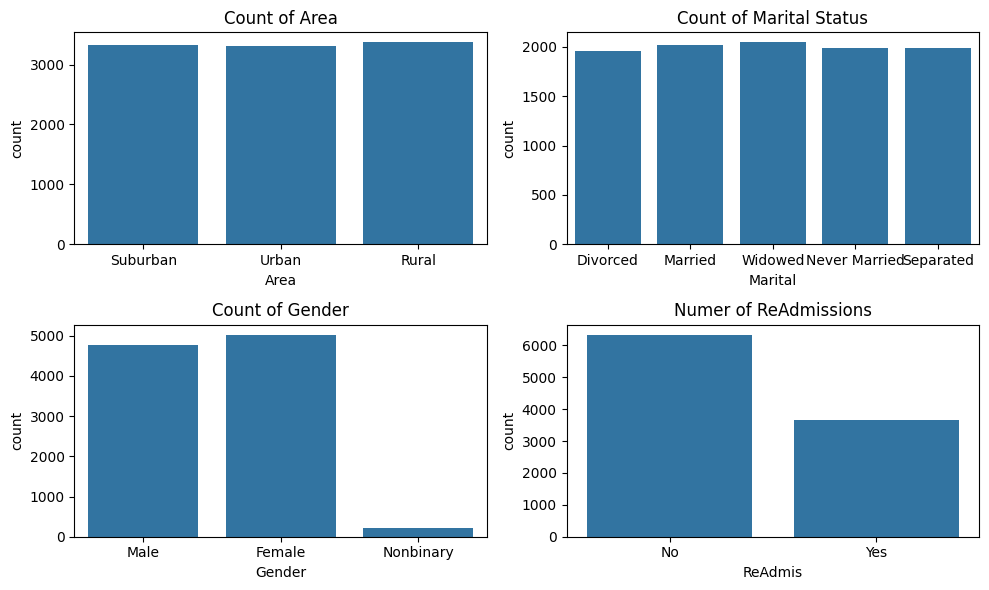

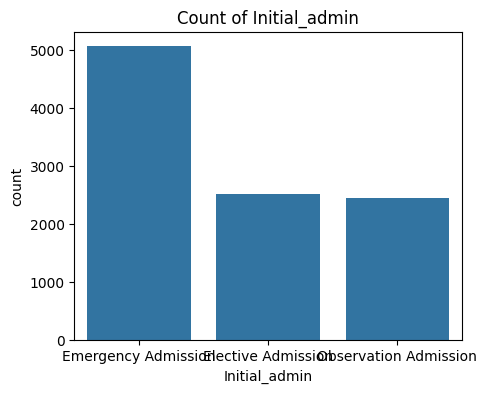

In [12]:
# Create a 2 by 2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Area
sns.countplot(data=df, x='Area', ax=axes[0, 0])
axes[0, 0].set_title('Count of Area')

# Marital
sns.countplot(data=df, x='Marital', ax=axes[0, 1])
axes[0, 1].set_title('Count of Marital Status')

# Gender
sns.countplot(data=df, x='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Count of Gender')

# ReAdmis
sns.countplot(data=df, x='ReAdmis', ax=axes[1, 1])
axes[1, 1].set_title('Numer of ReAdmissions')

plt.tight_layout()
plt.show()

# create a countplot for initial_admin
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Initial_admin')
plt.title('Count of Initial_admin')


plt.show()

# Proportion Summary 

`Area`
- Rural: 33.69%
- Urban: 33.03%
- Suburban: 33.28%

`Gender`
- Female: 50.18%
- Male: 47.68%
- Nonbinary: 2.14%

`Marital`
- Widowed: 20.45% 
- Married: 20.23% 
- Separated: 19.87% 
- Never Married: 19.84% 
- Divorced: 19.61%

`ReAdmis`
- No: 63.31%
- Yes: 36.69%

`Initial_admin`
- Emergency: 51.60%
- Elective: 25.04%
- Observation: 24.36%


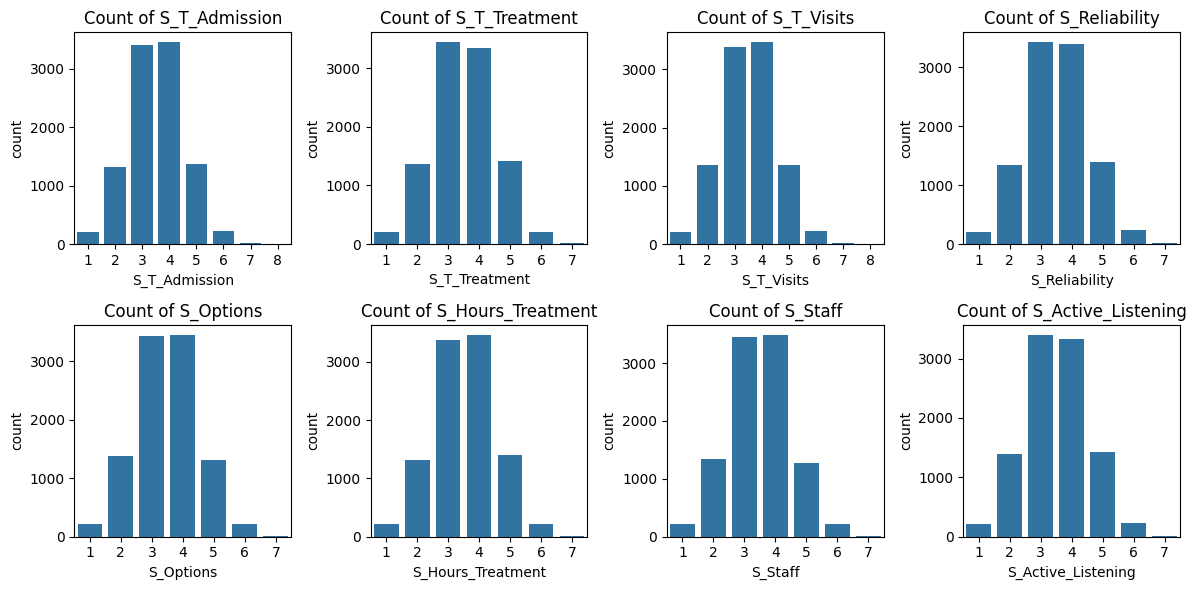

,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening
1,213,213.0,211,207.0,211.0,213.0,215.0,209.0
2,1315,1360.0,1356,1346.0,1380.0,1319.0,1345.0,1391.0
3,3404,3439.0,3379,3422.0,3423.0,3371.0,3456.0,3401.0
4,3455,3351.0,3464,3394.0,3446.0,3464.0,3487.0,3337.0
5,1377,1421.0,1358,1388.0,1308.0,1403.0,1274.0,1429.0
6,225,204.0,220,231.0,219.0,220.0,212.0,221.0
7,10,12.0,11,12.0,13.0,10.0,11.0,12.0
8,1,NaN,1,NaN,NaN,NaN,NaN,NaN


In [13]:

# 2 by 4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# S_T_Admission
sns.countplot(data=df, x='S_T_Admission', ax=axes[0, 0])
axes[0, 0].set_title('Count of S_T_Admission')

# S_T_Treatment
sns.countplot(data=df, x='S_T_Treatment', ax=axes[0, 1])
axes[0, 1].set_title('Count of S_T_Treatment')

# S_T_Visits
sns.countplot(data=df, x='S_T_Visits', ax=axes[0, 2])
axes[0, 2].set_title('Count of S_T_Visits')

# S_Reliability
sns.countplot(data=df, x='S_Reliability', ax=axes[0, 3])
axes[0, 3].set_title('Count of S_Reliability')

# S_Options
sns.countplot(data=df, x='S_Options', ax=axes[1, 0])
axes[1, 0].set_title('Count of S_Options')

# S_Hours_Treatment
sns.countplot(data=df, x='S_Hours_Treatment', ax=axes[1, 1])
axes[1, 1].set_title('Count of S_Hours_Treatment')

# S_Staff
sns.countplot(data=df, x='S_Staff', ax=axes[1, 2])
axes[1, 2].set_title('Count of S_Staff')

# S_Active_Listening
sns.countplot(data=df, x='S_Active_Listening', ax=axes[1, 3])
axes[1, 3].set_title('Count of S_Active_Listening')

plt.tight_layout()
plt.show()

# value counts for the survey items
df[['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']].apply(pd.Series.value_counts)

- Survey responses across various rating scales appear to be fairly evenly distributed among the different survey items. This uniformity could indicate a degree of correlation among the responses to these items. To explore potential patterns, we will utilize pie charts to visualize the distribution of responses and a correlation matrix to quantitatively assess the relationships between the items.

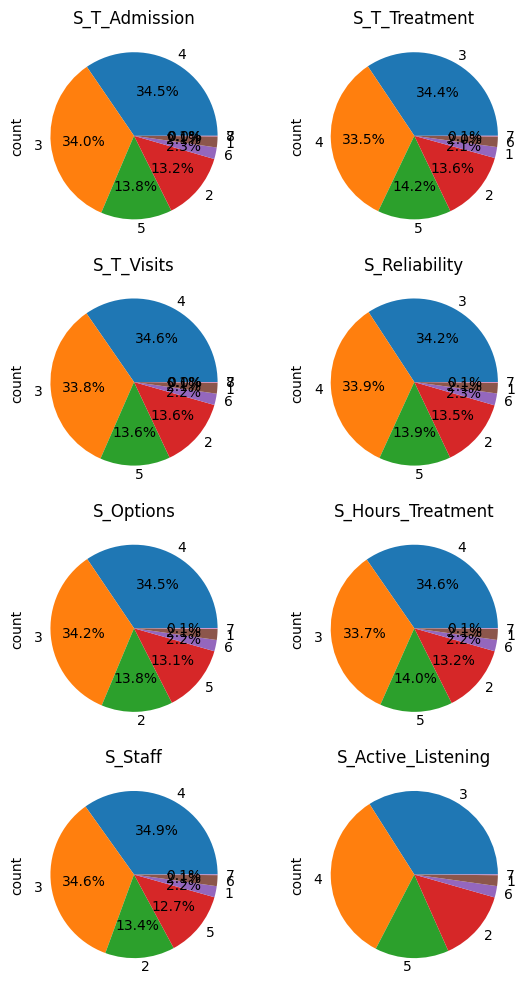

,count,mean,std,min,25%,50%,75%,max
S_T_Admission,10000.0,3.5188,1.031966,1.0,3.0,4.0,4.0,8.0
S_T_Treatment,10000.0,3.5067,1.034825,1.0,3.0,3.0,4.0,7.0
S_T_Visits,10000.0,3.5111,1.032755,1.0,3.0,4.0,4.0,8.0
S_Reliability,10000.0,3.5151,1.036282,1.0,3.0,4.0,4.0,7.0
S_Options,10000.0,3.4969,1.030192,1.0,3.0,3.0,4.0,7.0
S_Hours_Treatment,10000.0,3.5225,1.032376,1.0,3.0,4.0,4.0,7.0
S_Staff,10000.0,3.4940,1.021405,1.0,3.0,3.0,4.0,7.0
S_Active_Listening,10000.0,3.5097,1.042312,1.0,3.0,3.0,4.0,7.0


In [14]:
textprops = {"fontsize":10} 

# 2 by 4 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(6, 10))

# S_T_Admission
df['S_T_Admission'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%', textprops=textprops)
axes[0, 0].set_title('S_T_Admission')

# S_T_Treatment
df['S_T_Treatment'].value_counts().plot.pie(ax=axes[0, 1], autopct='%1.1f%%', textprops=textprops)
axes[0, 1].set_title('S_T_Treatment')

# S_T_Visits
df['S_T_Visits'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%', textprops=textprops)
axes[1, 0].set_title('S_T_Visits')

# S_Reliability
df['S_Reliability'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%', textprops=textprops)
axes[1, 1].set_title('S_Reliability')

# S_Options
df['S_Options'].value_counts().plot.pie(ax=axes[2, 0], autopct='%1.1f%%', textprops=textprops)
axes[2, 0].set_title('S_Options')

# S_Hours_Treatment
df['S_Hours_Treatment'].value_counts().plot.pie(ax=axes[2, 1], autopct='%1.1f%%', textprops=textprops)
axes[2, 1].set_title('S_Hours_Treatment')

# S_Staff
df['S_Staff'].value_counts().plot.pie(ax=axes[3, 0], autopct='%1.1f%%', textprops=textprops)
axes[3, 0].set_title('S_Staff')

# S_Active_Listening
df['S_Active_Listening'].value_counts().plot.pie(ax=axes[3, 1], textprops=textprops)
axes[3, 1].set_title('S_Active_Listening')
plt.tight_layout()
plt.show()

# display descriptive statistics for the survey items
df[['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']].describe().transpose()

- The pie charts and summary show similar pattern across with some survey responses having almost identical proportions. This could indicate a lack of variability in the responses, which may impact the predictive power of these variables in the regression model. 

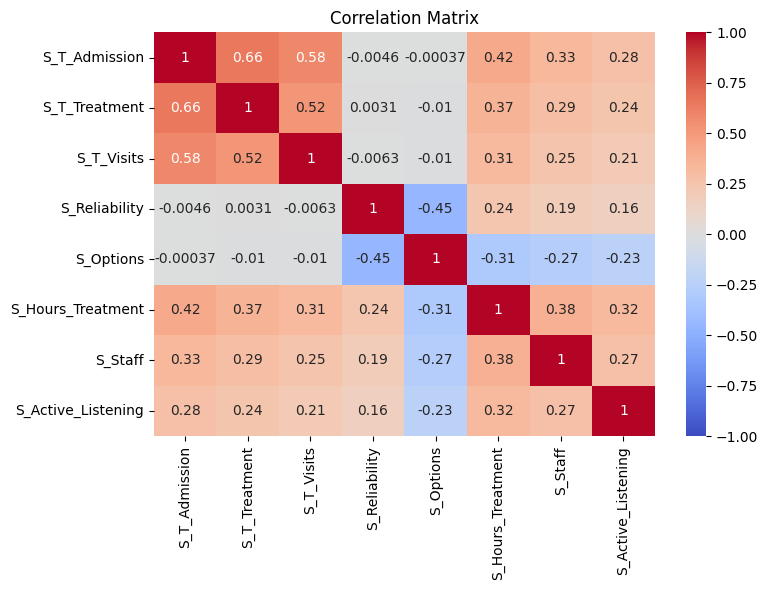

In [15]:
# Create a correlation matrix
#  the columns correlation matrix
cols = ['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability',
        'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']

corr_matrix = df[cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



- The correlation matrix shows that there may indeed be correlation amongst the different survey items. This could introduce multicolinarity into the regression model.

- These pairs of items have correlation coefficients very close to zero, suggesting that there is little to no linear relationship between them. When selecting variables for a regression model, these items might be preferred as they are less likely to introduce multicollinearity issues. We will note this during the initial model building phase. And check the VIF scores to confirm.

- S_T_Admission and S_Reliability: -0.0046
- S_T_Visits and S_Reliability: -0.0063
- S_T_Admission and S_Options: -0.0037
- S_T_Treatment and S_Options: -0.01
- S_T_Visits and S_Options: -0.01


# Bivariate Visualizations

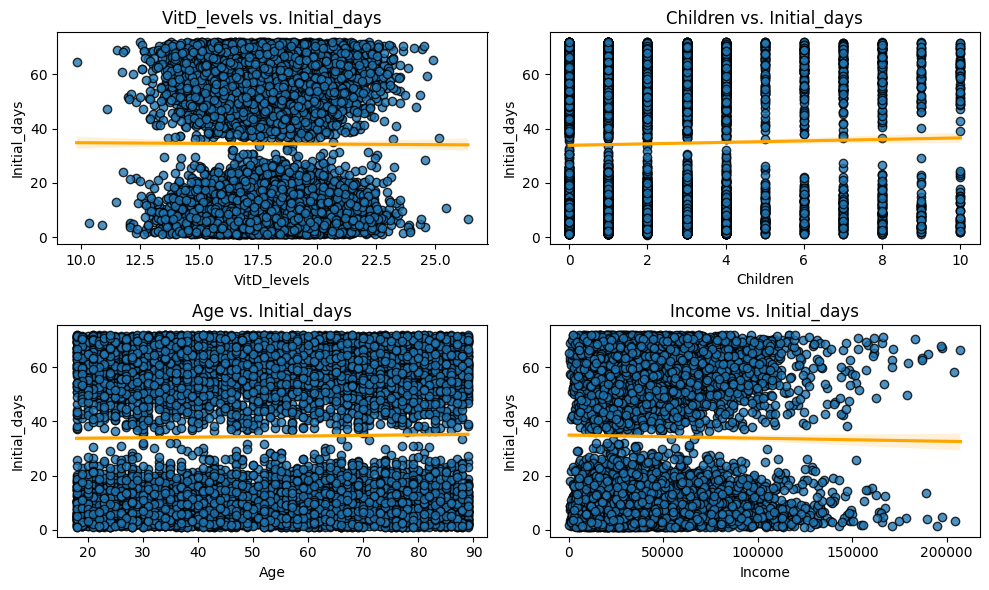

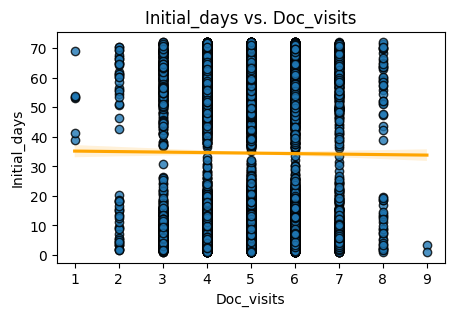

In [16]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(10, 6))

# VitD_levels: Scatter plot of VitD_levels vs. Initial_days
plt.subplot(2, 2, 1)
sns.regplot(data=df, x='VitD_levels', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('VitD_levels vs. Initial_days')

# Children: Scatter plot of Children vs. Initial_days
plt.subplot(2, 2, 2)
sns.regplot(data=df, x='Children', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Children vs. Initial_days')

# Age: Scatter plot of Age vs. Initial_days
plt.subplot(2, 2, 3)
sns.regplot(data=df, x='Age', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Age vs. Initial_days')

# Income: Scatter plot of Income vs. Initial_days
plt.subplot(2, 2, 4)
sns.regplot(data=df, x='Income', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Income vs. Initial_days')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.regplot(data=df, x='Doc_visits', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Initial_days vs. Doc_visits')
plt.show()

 - `Vitamin D` levels and initial days don't seem to have a clear pattern, with no obvious relationship. When it comes to `children` ther is no distinct trend, suggesting the number of children doesn't linearly affect the length of hospital stay. `Age` shows a spread of data across the age range without a strong trend. For `income`, there's more variability at higher income levels, but there is no clear pattern suggesting a strong relationship. Overall, these plots suggest that individually, these variables do not have a simple linear relationship with the number of initial days spent in the hospital. However, together they might. Income might benifit from a transformation to better understand the relationship. `Doc_visits` suggest that there is no strong, straightforward relationship between the number of doctor visits and the average initial days, as increased doctor visits do not correlate with either a significant increase or decrease in the initial days.



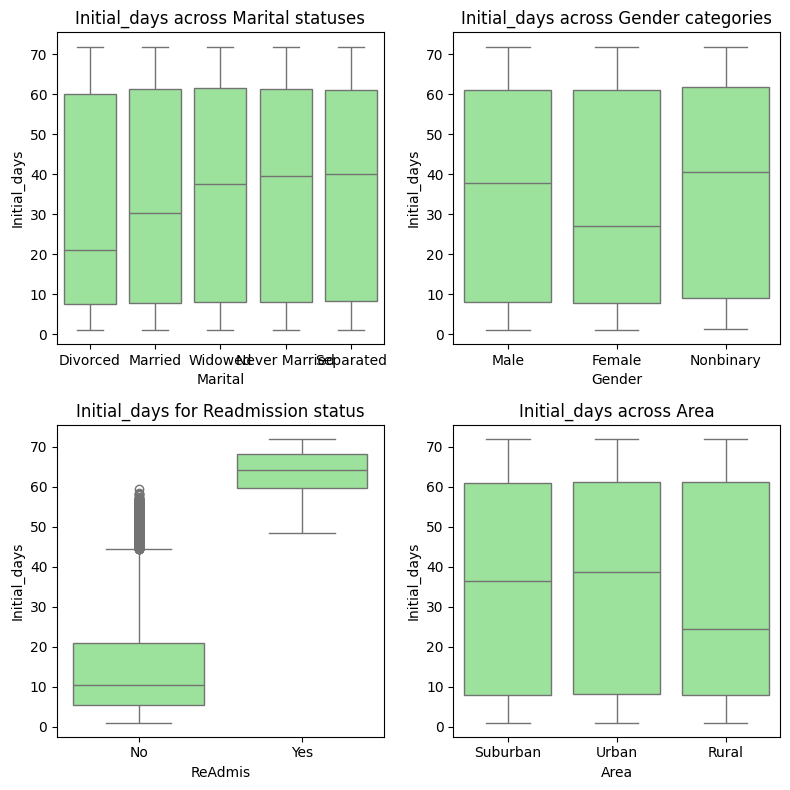

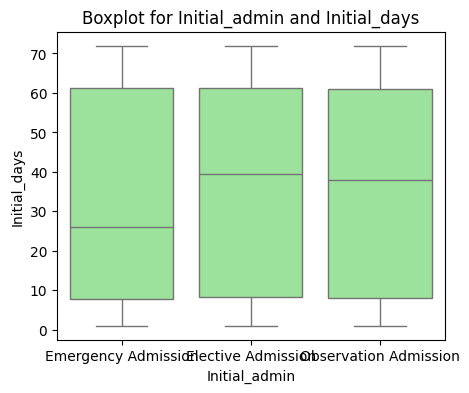

In [17]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(8, 8))
# Marital: box plot showing distribution of Initial_days across Marital statuses
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Marital', y='Initial_days', color='lightgreen')
plt.title('Initial_days across Marital statuses')

# Gender: box plot showing distribution of Initial_days across Gender categories
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Gender', y='Initial_days', color='lightgreen')
plt.title('Initial_days across Gender categories')

# ReAdmis: box plot showing distribution of Initial_days for Readmission status
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='ReAdmis', y='Initial_days', color='lightgreen')
plt.title('Initial_days for Readmission status')

# Area: box plot showing distribution of Initial_days across Area categories
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Area', y='Initial_days', color='lightgreen')
plt.title('Initial_days across Area')

plt.tight_layout()
plt.show()

# boxplot with Initial_admin and Initial_days
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Initial_admin', y='Initial_days', color='lightgreen')
plt.title('Boxplot for Initial_admin and Initial_days')
plt.show()


The `Marital` statuses plot shows that seperated and single patients tend to have the highest number of days in the hospital, and that divorced and married tended to spend fewer days. The `Gender` categories show slightly higher median Initial_days for males and non binary patients and a notably lower median for females compared to males. The `Readmission` plot is very interesting. It shows a significantly higher median and and grouping of `Initial_days` for readmitted patients compared to non-readmitted patients, with several outliers representing long stays among readmitted patients. Lastly, the Area plot demonstrates a slightly lower median for urban areas, suggesting hospital time is less for urban patients compared to rural and suburban patients. Interstingly, `Initial_admin` shows a higher median for elective admissions compared to emergency admissions.

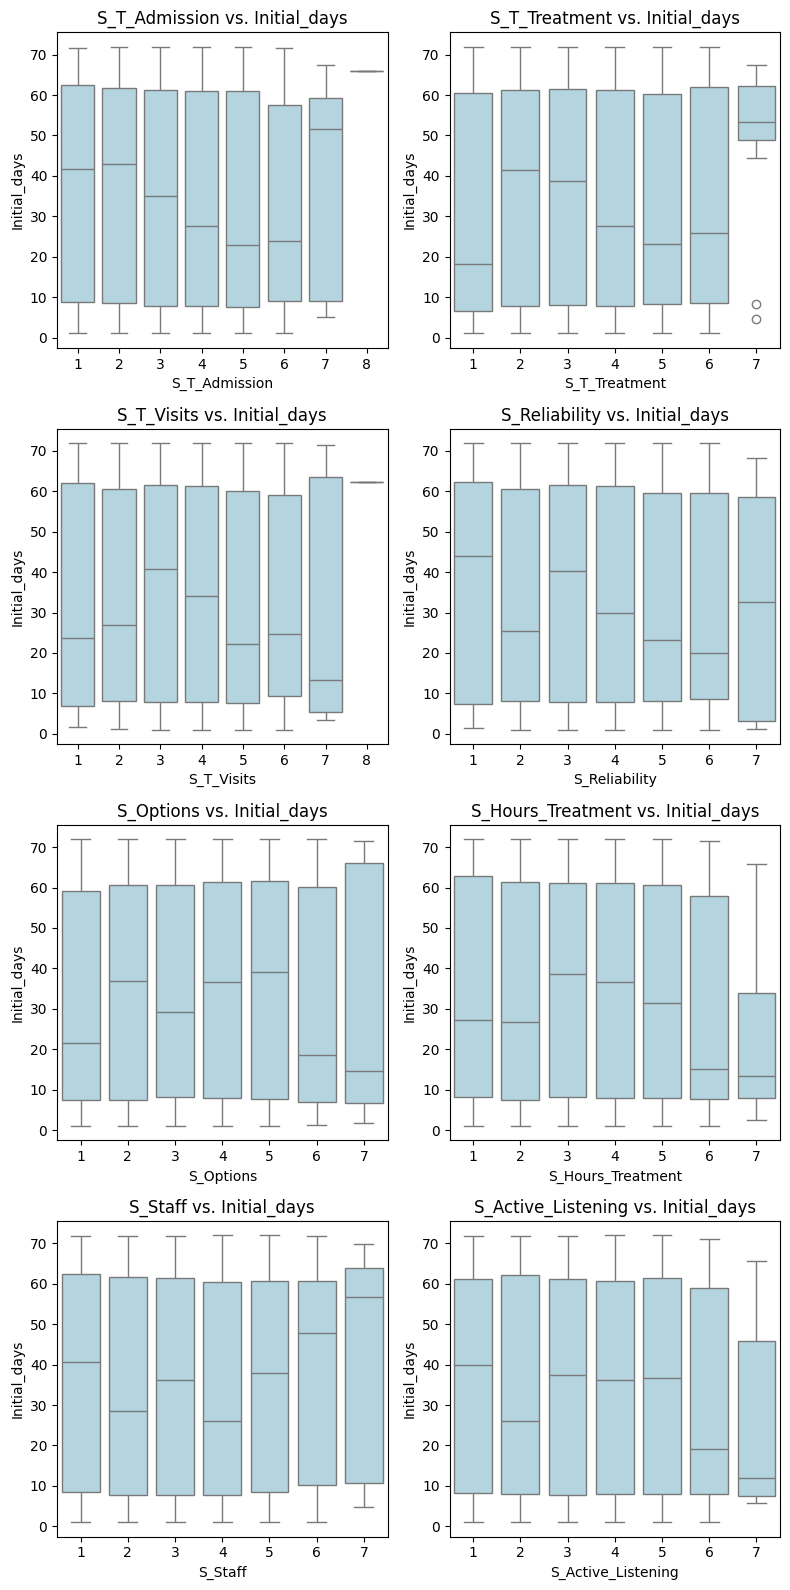

In [18]:
# 4 by 2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(8, 16))

# S_T_Admission
sns.boxplot(data=df, x='S_T_Admission', y='Initial_days', ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('S_T_Admission vs. Initial_days')

# S_T_Treatment
sns.boxplot(data=df, x='S_T_Treatment', y='Initial_days', ax=axes[0, 1], color='lightblue')
axes[0, 1].set_title('S_T_Treatment vs. Initial_days')

# S_T_Visits
sns.boxplot(data=df, x='S_T_Visits', y='Initial_days', ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title('S_T_Visits vs. Initial_days')

# S_Reliability
sns.boxplot(data=df, x='S_Reliability', y='Initial_days', ax=axes[1, 1], color='lightblue')
axes[1, 1].set_title('S_Reliability vs. Initial_days')

# S_Options
sns.boxplot(data=df, x='S_Options', y='Initial_days', ax=axes[2, 0], color='lightblue')
axes[2, 0].set_title('S_Options vs. Initial_days')

# S_Hours_Treatment
sns.boxplot(data=df, x='S_Hours_Treatment', y='Initial_days', ax=axes[2, 1], color='lightblue')
axes[2, 1].set_title('S_Hours_Treatment vs. Initial_days')

# S_Staff
sns.boxplot(data=df, x='S_Staff', y='Initial_days', ax=axes[3, 0], color='lightblue')
axes[3, 0].set_title('S_Staff vs. Initial_days')

# S_Active_Listening
sns.boxplot(data=df, x='S_Active_Listening', y='Initial_days', ax=axes[3, 1], color='lightblue')
axes[3, 1].set_title('S_Active_Listening vs. Initial_days')

plt.tight_layout()
plt.show()


- Seeing these survey results in a bivariate plot with Initial_days is interesting in the variation in the median Initial_days across the different survey responses. Admittedly, I am a little unsure about how to interpret this. The initial thinking is that there is some interesting insights to gleam from this. Perhaps this suggests that the survey responses may have some predictive power in determining the length of a patient's hospital stay.

----------------------------------------------------------------------

--------------------

In [19]:
# manage memory by using gc.collect() to clear memory
import gc
gc.collect()


51275